Objectives: Practice dealing with Dataset.
(학습 목표 : Dataset 을 다루는 연습을 합니다)


In [0]:
import warnings      
warnings.filterwarnings('ignore')      # 경고문 무시하겠다

In [0]:
import numpy as np        # 넘파이는 파이썬에서 수학을 쓰게 해주는 애. 여기서는 파이썬을 쓰고 있음. 그런데 파이썬으로 텐서플로만 하지 않을 거잖아. 단순~머신러닝까지 파이썬에서 다 할수 있기에 필요한거 추가해서 넣어서 쓸 수 있음 그래서 import함.
import matplotlib.pyplot as plt      # plt는 그림을 그려주는 애
#import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data # 데이터를 가져다 놓음

* Download dataset

In [0]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) 

#for furture version mnist = tf.keras.datasets.mnist

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [0]:
print(mnist.train.images.shape) #트레이닝 데이터가 5만 5천개인데 얘를 28개씩 잘라서 쌓으면 28*28인 784 형태의 이미지가 나옴 정보를 다루는 사람들이 파일을 저장할때 이미지를 이미지로 안보고 한줄로 바꿔놓은 거임
print(mnist.test.images.shape) # mnist밑에 train과 test가 있고 train속에도 이미지가 있고.  # 55000, 10000은 구글에서 설정해놓은거 바꿀 수 있음

(55000, 784)
(10000, 784)


In [0]:
print(mnist.train.labels.shape)  # 데이터가 있으면 정답이 있어야지. 그냥 라벨이 10개니까가 아니라 확률을 봐야하기에 확률담을 그릇 10개를 만드는 거임 그리고 각각의 확률을 보는거임. 
print(mnist.test.labels.shape)

(55000, 10)
(10000, 10)


그럼 총 55000*784 개임. 일종의 2차원 이미지가 되었음 빨리 읽어들이기 위함임. 머신러닝 전에 데이터 전처리 과정을 말하는 거임. 데이터 전처리도 중요한 부분임.



In [0]:
idx = 2847
#idx = 9999 # 10000번째를 넣으면 index error가 남. 10000번째는 없는거임 10000개는 있지만. 그래서 마지막은 9999

In [0]:
'mnist.test.images[{}]'.format(idx)

'mnist.test.images[2847]'

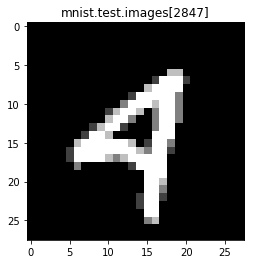

In [0]:
img1 = mnist.test.images[idx] # 시험보는 애를 그려보겠다.
img1 = np.array(img1, dtype='float') # 그림을 그리기 위한것. 이미지를 소수점 타입으로 바꿈

pixels = img1.reshape((28, 28)) #28곱하기 28이 784 shape을 이렇게 바꿈 다 잘라놓은거를 붙여야 하니까
plt.imshow(pixels, cmap='gray') #plt는 그림을 그리기 위한 부분 pixels를 그릴건데 칼라맵은 그레이다. 이거 안하면 색깔나옴 흑백으로 그리려고 저렇게 함
plt.title('mnist.test.images[{}]'.format(idx)) # 이미지 위에 제목 써놓기 위해
plt.show() #plt 를 그려라

이제 9999번째 이미지 6이 6이라는 것을 컴에게 알게해야함.  이미지를 다잘라서 폈기에  = 2차원 이미지로 저장안하고 그래서 784가 된거임

In [0]:
mnist.test.labels[idx]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])

In [0]:
label1 = mnist.test.labels[idx] # mist 우체국 데이터 테스트 이미지중에 이미지의 정답이겠구나(labels)   # test를 꺼내올때는 9999까지 꺼내올 수 있겠구나 
print(label1)   # 1은 100% 즉 확률을 말하는 거임. 다음에 머신러닝함녀 100%로는 못뱉어줌. 0.7%로 줄수 있음 나머지 0.3은 헷갈렸던 거로 가고...

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [0]:
np.argmax(label1)   # 이렇게 6으로 정답뽑으려고 argmax   마자막 단계는 항상 argmax이거로 확률중에 제일 높은 것 즉 정답을 뽑아냄

4

위에 코드 실행하면 6이라고 안나오고 1이 6번째 자리에 나옴 . 이건 컴이 6일 확률이 가장 높고 나머지는 0.032322939792 퍼센트야. 

Students 
* what is *one-hot encoding* ?
* What does the code below mean? (아래 코드의 의미는?)

In [0]:
label2 = np.argmax(label1)
print(label2)

4


To practice one more thing

In [0]:
np.argmax([0, 1, 6, 3, 2, -2, 5, 7, 10])  # arg(자리찾기)max 는 컴과학자들이 만들어낸 말인데 결과가 8이래 즉 여기서 10이 가장크고 8번째 자리 즉 리스트 안의 가장큰수를 뽑아주는 함수구나 그럼 아까 원핫에다가 넣으면 6을 뽑아주겠구만

8

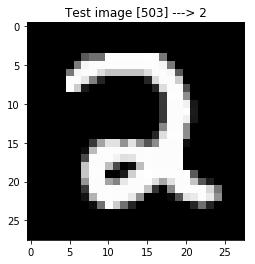

In [0]:
idx = 503
img1 = mnist.test.images[idx]
img1 = np.array(img1, dtype='float')
lbl1 = np.argmax(mnist.test.labels[idx])

pixels = img1.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
#plt.title('mnist.test.images[{}] ---> {}'.format(idx, lbl1))
plt.title('Test image [{}] ---> {}'.format(idx, lbl1))   # 데이터 많아지면 헷갈리므로 정답 바로 확인할 수 있게 lable을 넣어서 확인가능하게.
plt.show()